In [1]:
import sys
import os
import numpy
import collections
import matplotlib.pyplot as plt

FIRST = 65  # first char in ascii table
LAST = 90  # last char in ascii table
MIN = 0.063  # min max values for the IC
MAX = 0.073
ALPHABET = 26  # the total number of characters in the alphabet
LOOPTIME = 16  # total number of times looping to find m

In [2]:
m = 1  # key length of the cipher. It starts with 1, and loop until get to size of the cipher text or when we feel it's enough
n = 0  # length of the text
keyArray = []
# store the occurrence of each letter (Eng alphabet currently)
listIC = [] # a list of IC values to demonstrate on a graph

letterMatrix = [[65, 0],
                [66, 0],
                [67, 0],
                [68, 0],
                [69, 0],
                [70, 0],
                [71, 0],
                [72, 0],
                [73, 0],
                [74, 0],
                [75, 0],
                [76, 0],
                [77, 0],
                [78, 0],
                [79, 0],
                [80, 0],
                [81, 0],
                [82, 0],
                [83, 0],
                [84, 0],
                [85, 0],
                [86, 0],
                [87, 0],
                [88, 0],
                [89, 0],
                [90, 0],]

# letterMatrix = numpy.zeros([ALPHABET, 2], dtype = int)

In [3]:
""" The below function is used when we need to dynamically initiate a matrix to store characters of a random alphabet
def initMatrix():
    initLetter = FIRST # ascii number for 'a'
    for i in range(0, ALPHABET):
        letterMatrix[i][1] = initLetter;
        initLetter += 1
"""

def searchLetter(letter):
    return letter - FIRST


def ICFormula(f, length):  # occurrence of a letter, size of the text
    tu = float(f * (f - 1))
    mau = float(length * (length - 1))
    result = float(tu / mau)
    return result

# check if the total IC values are in range or not


def checkICValue(avg):
    listIC.append(round(avg, 4)) # append all the average values to demonstrate on a chart
    print ("average value: ", avg)
    if avg > MIN and avg < MAX:
        return 1
    return 0

# calculate IC in a specific m value


def indexOfCoincidence(str):
    result = 0
    for i in range(0, ALPHABET):
        # IC formula needs the occurrence of a character and length of the text
        result = result + ICFormula(letterMatrix[i][1], len(str))
        # reset the occurrences so we can use them for our next loop
        letterMatrix[i][1] = 0
    print ("")
    print ("IC result: ", result)
    print ("")
    return result  # return a result to store in the algo.

# this helps generating a subsequence string for cryptanalysis algorithm


def generateSubstring(str, length, count):
    if length == 1:  # m = 1 means the entire string already
        for i in range (0, n):
            letterMatrix[searchLetter(ord(str[i]))][1] += 1 # increment occurrence of the original text from 0 to n
        return str
    substr = []
    while count < n:  # since we have a cipher text size n, so always generate a substring to n max
        substr.append(str[count])
        # increment occurrence of the string immediately to reduce loop time
        letterMatrix[searchLetter(ord(str[count]))][1] += 1
        count += length
    print ("Sequence: ", substr)
    return substr


def vigenereAlgorithm(str, m):
    # m can only reach the length of the original cipher text. LOOPTIME here is a value for testing
    for m in range(1, LOOPTIME):
        avg = 0
        print ("Value of m currently: ", m)
        for i in range(0, m):
            # put i here because we need to increase index to get new substring
            avg += indexOfCoincidence(generateSubstring(str, m, i))
        # increment to get the total value, and then divide by the number of substrings to get average
        if checkICValue(avg / m) == 1:
            keyArray.append(m)

    if m == n - 1:
        print ("Meaningless text")

In [4]:
### Stage 2: Find key using key length ###

english_freq = {
        'A': .08167, 'B': .01492, 'C': .02782, 'D': .04253,
        'E': .12702, 'F': .02228, 'G': .02015, 'H': .06094,
        'I': .06094, 'J': .00153, 'K': .00772, 'L': .04025,
        'M': .02406, 'N': .06749, 'O': .07507, 'P': .01929,
        'Q': .00095, 'R': .05987, 'S': .06327, 'T': .09056,
        'U': .02758, 'V': .00978, 'W': .02360, 'X': .00150,
        'Y': .01974, 'Z': .00074
    }

def compute_x_2(cosset):
    visited = {}
    counter = collections.Counter(cosset)
    x_2 = 0
    for ch in english_freq:
        if ch not in visited:
            f_i = counter[ch]/len(cosset)
            F_i = english_freq[ch]
            x_2 = x_2 + (f_i-F_i)**2/F_i
            visited[ch] = 1
    return x_2

def find_key(ct, key_len):
    cosets = []
    x_2_table = []

    # generate cosets from ciphertext with known key length
    for i in range(key_len):
        cosets.append([ct[j] for j in range(i, len(ct), key_len)])

    # fill up x_2_table
    for shift in range(65, 65+26, 1):
        cosets_tmp = cosets[:]
        for i in range(len(cosets_tmp)):
            cosets_tmp[i] = [chr(65+(ord(ch) - shift)%26) for ch in cosets_tmp[i]]
        x_2_table.append([compute_x_2(coset) for coset in cosets_tmp])

    print("\n***** X2 table: https://pages.mtu.edu/~shene/NSF-4/Tutorial/VIG/Vig-Recover.html *****\n")
    for i in range(len(x_2_table)):
        print(x_2_table[i])

    # obtain min index of each column of X2 table -> key character
    min_idx = numpy.argmin(x_2_table, axis=0)
    key = [chr(65+idx) for idx in min_idx]
    return "".join(key)

def repeat_key(key, length):
    return (key * (int(length/len(key))+1))[:length]

def decrypt(ct, key):
    key_dup = repeat_key(key, len(ct))
    pt = ''
    for i in range(len(ct)):
        pt = pt + chr( 65 + (ord(ct[i])-ord(key_dup[i]))%26 )
    return pt

In [5]:
#strSample = "chrEEVOAHMAERATBIAXXWTNXBEEOPHBSBQMQEQERBWRVXUOAKXAOSXXWEAHBWGJMMQMNKGRFVGXWTRZXWIAKLXFPSKAUTEMNDCMGTSXMXBTUIADNGMGPSRELXNJELXVRVPRTULHDNQWTWDTYGBPHXTFALJHASVBFXNGLLCHRZBWELEKMSJIKNBHWRJGNMGJSGLXFEYPHAGNRBIEQJTAMRVLCRREMNDGLXRRIMGNSNRWCHRQHAEYEVTAQEBBIPEEWEVKAKOEWADREMXMTBHHCHRTKDNVRZCHRCLQOHPWQAIIWXNRMGWOIIFKEE"
strSample = "YQARLWMRDWSFCXZYXKNSFREFCSMQPQZYJQXKGRLMWGZWOFIFJMKRIFGRYRSLFMKQSFEMXCIDJMCCMLFEKQYUFEVCIHCVECEFGRYRLSLXZCWMPJSAIADIWJWGKIKMVLMJWVTJCWKGSFMJJCPALUMGWZKIFRSXJILRMFEKGJMCCLWQJALEDJCKYMVMOSWEFBKATIFSTZGWXGKZREYYMFQXARMVMRLIRGULWJTECTWMTDCLSQLWQTGIIFYFGSXLFMKQSFEEFBAZYXARQWYRK"
strTest = strSample.upper()
print ("Sample string: ", strTest)
#strTest = "IFMSWFCNICXKDICSAOOSSHRVKJFDNFCJIPZFGVBPGGYVPGTHJVPYHMPRRJKSCUKXKSYZQSHAOFMCEWIYRPZSFVNTGRKEEQXRNVBIASTVDDKSUFKTMWOVQEKSUVPKXRGOOJBGKKCHASCEDPBZWGQDLVQKJTTTYZQTBBOZLJMSTYGVASUKFXLOTIGKXRHFPENHCEBWHDGJJXOSFSWGHCOJMWBBPFBTTHJYMJLSEFLIXBVVBSBFGTRXHBUVNIXADVPQNHGEBAXRGOATEZGERDNFUVJKXG"
#strTest = "NWAIWEBBRFQFOCJPUGDOJVBGWSPTWRZ"
#strTest = "VVQGYTVVVKALURWFHQACMMVLEHUCATWFHHIPLXHVUWSCIGINCMUHNHQRMSUIMHWZODXTNAEKVVQGYTVVQPHXINWCABASYYMTKSZRCXWRPRFWYHXYGFIPSBWKQAMZYBXJQQABJEMTCHQSNAEKVVQGYTVVPCAQPBSLURQUCVMVPQUTMMLVHWDHNFIKJCPXMYEIOCDTXBJWKQGAN"
n = len(strTest)
print ("length of the str: ", n)
vigenereAlgorithm(strTest, 1)
print (listIC)

Sample string:  YQARLWMRDWSFCXZYXKNSFREFCSMQPQZYJQXKGRLMWGZWOFIFJMKRIFGRYRSLFMKQSFEMXCIDJMCCMLFEKQYUFEVCIHCVECEFGRYRLSLXZCWMPJSAIADIWJWGKIKMVLMJWVTJCWKGSFMJJCPALUMGWZKIFRSXJILRMFEKGJMCCLWQJALEDJCKYMVMOSWEFBKATIFSTZGWXGKZREYYMFQXARMVMRLIRGULWJTECTWMTDCLSQLWQTGIIFYFGSXLFMKQSFEEFBAZYXARQWYRK
length of the str:  273
Value of m currently:  1

IC result:  0.04821159232923938

average value:  0.04821159232923938
Value of m currently:  2
Sequence:  ['Y', 'A', 'L', 'M', 'D', 'S', 'C', 'Z', 'X', 'N', 'F', 'E', 'C', 'M', 'P', 'Z', 'J', 'X', 'G', 'L', 'W', 'Z', 'O', 'I', 'J', 'K', 'I', 'G', 'Y', 'S', 'F', 'K', 'S', 'E', 'X', 'I', 'J', 'C', 'M', 'F', 'K', 'Y', 'F', 'V', 'I', 'C', 'E', 'E', 'G', 'Y', 'L', 'L', 'Z', 'W', 'P', 'S', 'I', 'D', 'W', 'W', 'K', 'K', 'V', 'M', 'W', 'T', 'C', 'K', 'S', 'M', 'J', 'P', 'L', 'M', 'W', 'K', 'F', 'S', 'J', 'L', 'M', 'E', 'G', 'M', 'C', 'W', 'J', 'L', 'D', 'C', 'Y', 'V', 'O', 'W', 'F', 'K', 'T', 'F', 'T', 'G', 'X', 'K', 'R', 'Y', 'M', 'Q', 'A', 'M', 'M', 'L', 'R',

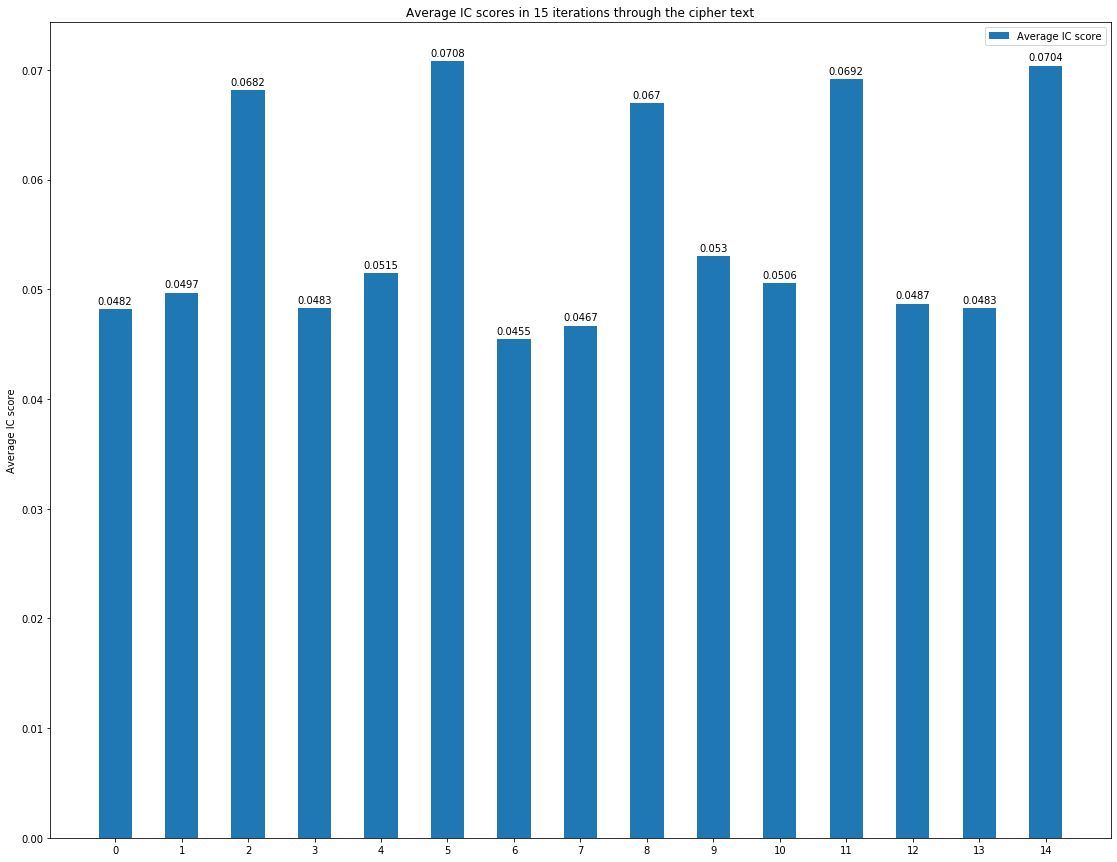

In [6]:
#chỉnh kích cỡ cho chart
plt.rcParams['figure.figsize'] = 19, 15
    
fig, ax = plt.subplots()
    
#fig, ax = plt.subplots() # use this in order to truly adjust everything else. Dont work directly with plt.
xvals = range(len(listIC))
rects = ax.bar(xvals, listIC, width = 0.5)
ax.set_xticks(range(0, len(listIC)))
ax.set_title('Average IC scores in 15 iterations through the cipher text')
ax.set_ylabel('Average IC score')
ax.legend(['Average IC score'])
    
"""Attach a text label above each bar in *rects*, displaying its height."""
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

In [7]:
#for i in range(0, len(keyArray)):
#    print (keyArray[i])
if len(keyArray) == 0:
    print ("Cannot find m such that the key is meaningful")
else:
    print ("Possible key lengths: ")
    for i in range(0, len(keyArray)):
        print (keyArray[i])
        key_len = keyArray[i]
        print("\n[*] Key Length = " + str(key_len))
        key = find_key(strTest, key_len)
        print("\n[*] Key = " + key)
        pt = decrypt(strTest, key)
        print("\n[*] Plaintext = " + pt)

Possible key lengths: 
3

[*] Key Length = 3

***** X2 table: https://pages.mtu.edu/~shene/NSF-4/Tutorial/VIG/Vig-Recover.html *****

[15.990049596826125, 6.499886673526783, 10.458912364148372]
[18.86040964819164, 8.909465606898983, 18.111251107926382]
[3.770275999806988, 14.168840813562968, 9.824489308898633]
[33.50260186723077, 15.573094172195358, 6.46297881464296]
[2.462595718008844, 0.4473005748429895, 5.68721551555949]
[15.793873411595703, 11.676903538547563, 3.7819702909814876]
[7.075105671169286, 8.32955949340967, 51.190688860524354]
[18.704690166348676, 13.944236050232002, 9.147254163481506]
[16.991621091549142, 5.874858860128874, 22.623079801076237]
[5.920181256570648, 26.095412610382915, 10.569895789415456]
[9.347641377193135, 7.073553522209796, 11.402673388089083]
[3.6352885668472865, 12.491308659513095, 18.002394181261685]
[27.37276264093703, 9.250627619292302, 11.42675459563586]
[12.282254175149376, 26.698466836139712, 17.06918302675549]
[3.9390209020319835, 16.03435651507